<a href="https://colab.research.google.com/github/tadiwamark/pdM_Genset_Analytics/blob/main/pdM_Genset_Analytics_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintanance in IIoT

Using historical data to predict future failure in FG Wilson generators

# Dataset Desscription

The dataset from the "Processed MegaPak Genset Test results 07-03-2021" contains detailed measurements from tests conducted on a generator set (genset). Below is a description of the dataset, highlighting each feature:

1. **Time:** Timestamps indicating when each measurement was taken.

2. **AverageCurrent (A):** The average current in amperes, representing the electrical load on the genset.

3. **Phase1Current (A), Phase2Current (A), Phase3Current (A):** These columns provide current measurements for three separate phases of the electrical supply, indicating how the load is distributed across these phases.

4. **ExhaustTemp (°C):** The temperature of the exhaust in degrees Celsius, a critical parameter for monitoring the engine's thermal performance.

5. **InLetPressure (KPa) and OutLetPressure (KPa):** These columns measure the pressure at the inlet and outlet in kilopascals, which can be important for understanding the air or fluid flow dynamics in the system.

6. **OutLetAirTemp (°C):** Temperature at the outlet, measured in degrees Celsius.

7. **CoolantTemp (°C):** The temperature of the cooling agent (likely water or a special coolant) in degrees Celsius. This is vital for ensuring the genset does not overheat.

9. **OilPressure (KPa):** The oil pressure in kilopascals, a critical indicator of the engine's lubrication system's health.

10. **PowerFactor:** A dimensionless number (ranging between -1 and 1) representing the efficiency with which the genset is converting electrical power into usable work output.

11. **Speed (Rpm):** The rotational speed of the genset's engine, measured in revolutions per minute (rpm).

12. **AmbientTemp (°C):** The ambient (surrounding) temperature in degrees Celsius, which can influence the genset's performance.

13. **FuelLevel (Ltrs):** The level of fuel in the genset, measured in liters.

14. **Freq (Hz):** Frequency of the electrical output in hertz (Hz), indicating the stability and quality of the electrical supply.

This dataset is rich in details and allows for a comprehensive analysis of the genset's performance, including aspects like electrical load handling, thermal management, and overall operational efficiency. It can be used to identify potential issues, track the performance over time, and ensure the genset operates within safe and efficient parameters.

# Objective of the Data Analytics



Predictive Analytics: Using historical data to predict future failure in FG Wilson generators

# Detailed Exploratory Data Analytics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Settings for better readability and layout
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Final_Year_Project/Processed MegaPak Genset Test results 07-03-2021.csv'
genset_data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(genset_data.head())

First few rows of the dataset:
             Time  AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
0  3/7/2021 16:05                 47                 0                 0   
1  3/7/2021 16:05                 47                 0                 0   
2  3/7/2021 16:05                 47                 0                 0   
3  3/7/2021 16:05                 47                 0                 0   
4  3/7/2021 16:05                 47                 0                 0   

   Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
0                 0          268.7981             8.00708   
1                 0          268.7981             8.00708   
2                 0          268.7981             8.00708   
3                 0          268.7981             8.00708   
4                 0          268.7981             8.00708   

   outLetPressure(KPa)  OutLetAirTemp(°C)  CoolantTemp( °C)  OilPressure(KPa)  \
0             1.763306           25.31421          48.21875     

In [6]:
# Basic Information of the Dataset
print("\nBasic Information:")
print(genset_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 1929 non-null   object 
 1   AverageCurrent(A)    1929 non-null   int64  
 2   Phase1Current(A)     1929 non-null   int64  
 3   Phase2Current(A)     1929 non-null   int64  
 4   Phase3Current(A)     1929 non-null   int64  
 5   ExhaustTemp( °C)     1929 non-null   float64
 6   inLetPressure(KPa)   1929 non-null   float64
 7   outLetPressure(KPa)  1929 non-null   float64
 8   OutLetAirTemp(°C)    1929 non-null   float64
 9   CoolantTemp( °C)     1929 non-null   float64
 10  OilPressure(KPa)     1928 non-null   float64
 11  PowerFactor          1928 non-null   float64
 12  Speed(Rpm)           1928 non-null   float64
 13  AmbientTemp( °C)     1928 non-null   float64
 14  FuelLevel(Ltrs)      1928 non-null   float64
 15  Freq(Hz)          

In [7]:
# Statistical Summary of the Dataset
print("\nStatistical Summary:")
print(genset_data.describe())


Statistical Summary:
       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        1929.000000       1929.000000       1929.000000   
mean          377.021773        409.476931        324.500259   
std           355.377103        381.369756        317.589660   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%           269.000000        334.000000        207.000000   
75%           673.000000        725.000000        565.000000   
max          1019.000000       1061.000000       1061.000000   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       1929.000000       1929.000000         1929.000000   
mean         398.961120        490.048312           72.983006   
std          374.911521        169.964874           73.604658   
min            0.000000        235.242500           -8.433533   
25%            0.000000        306.432000            5.849976   
50%        

In [8]:
genset_data.replace([np.inf, -np.inf], np.nan, inplace=True)
genset_data.fillna(genset_data.mean(), inplace=True)

<ipython-input-8-d63e7c6b290a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genset_data.fillna(genset_data.mean(), inplace=True)


In [9]:
# Verify no NaN values exist
assert not genset_data.isna().any().any()

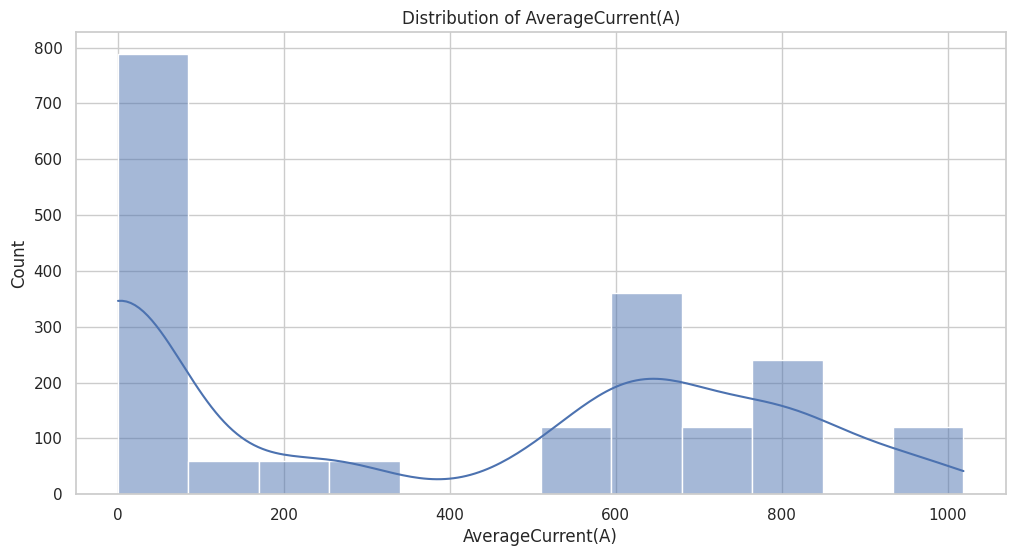

In [97]:
# Individual Feature Analysis

# Histograms for distribution
plt.figure(figsize=(12, 6))
plt.title("Distribution of AverageCurrent(A)")
sns.histplot(genset_data['AverageCurrent(A)'], kde=True)
plt.show()

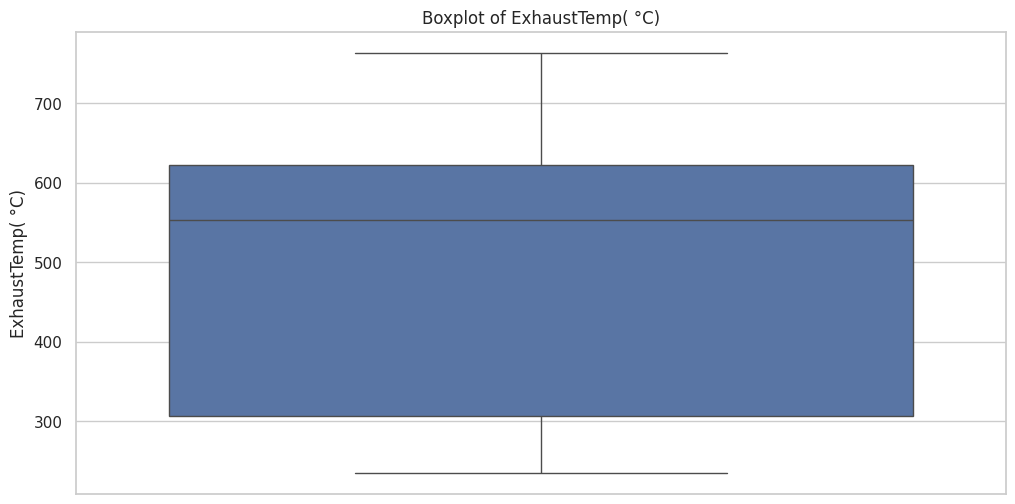

In [98]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
plt.title("Boxplot of ExhaustTemp( °C)")
sns.boxplot(y=genset_data['ExhaustTemp( °C)'])
plt.show()

<ipython-input-99-eb598c027af4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = genset_data.corr()


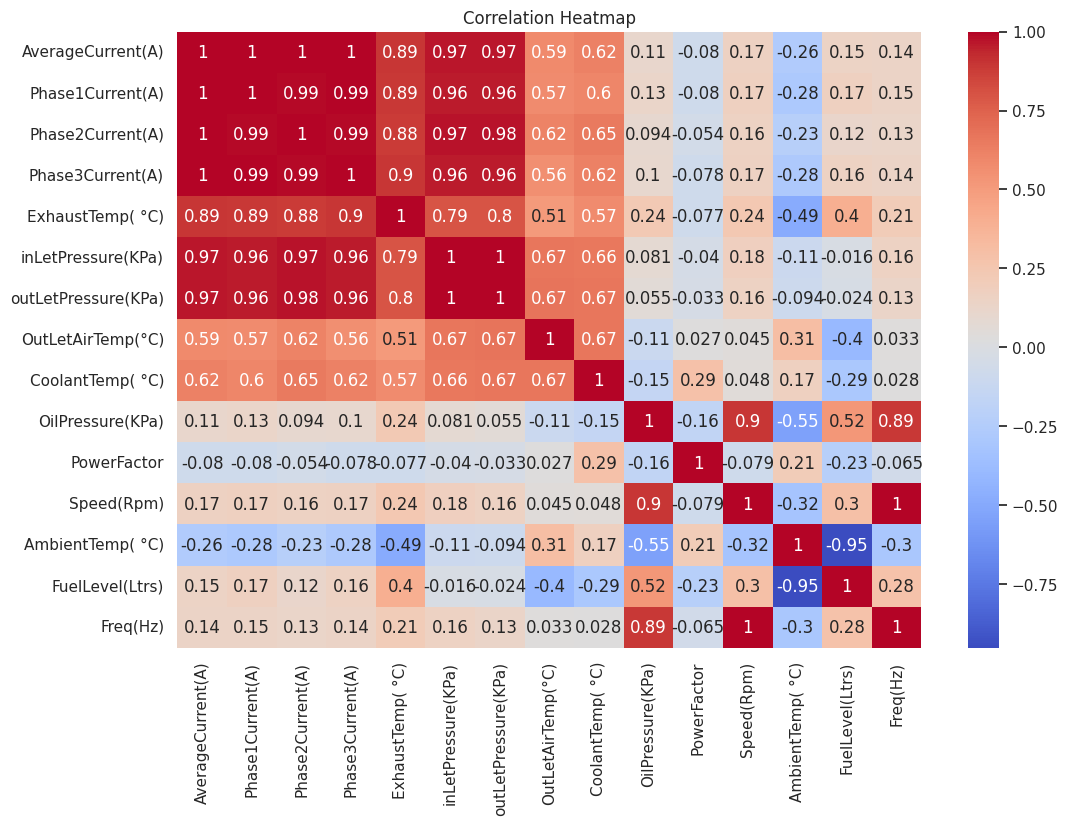

In [99]:
# Correlation Analysis
correlation_matrix = genset_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

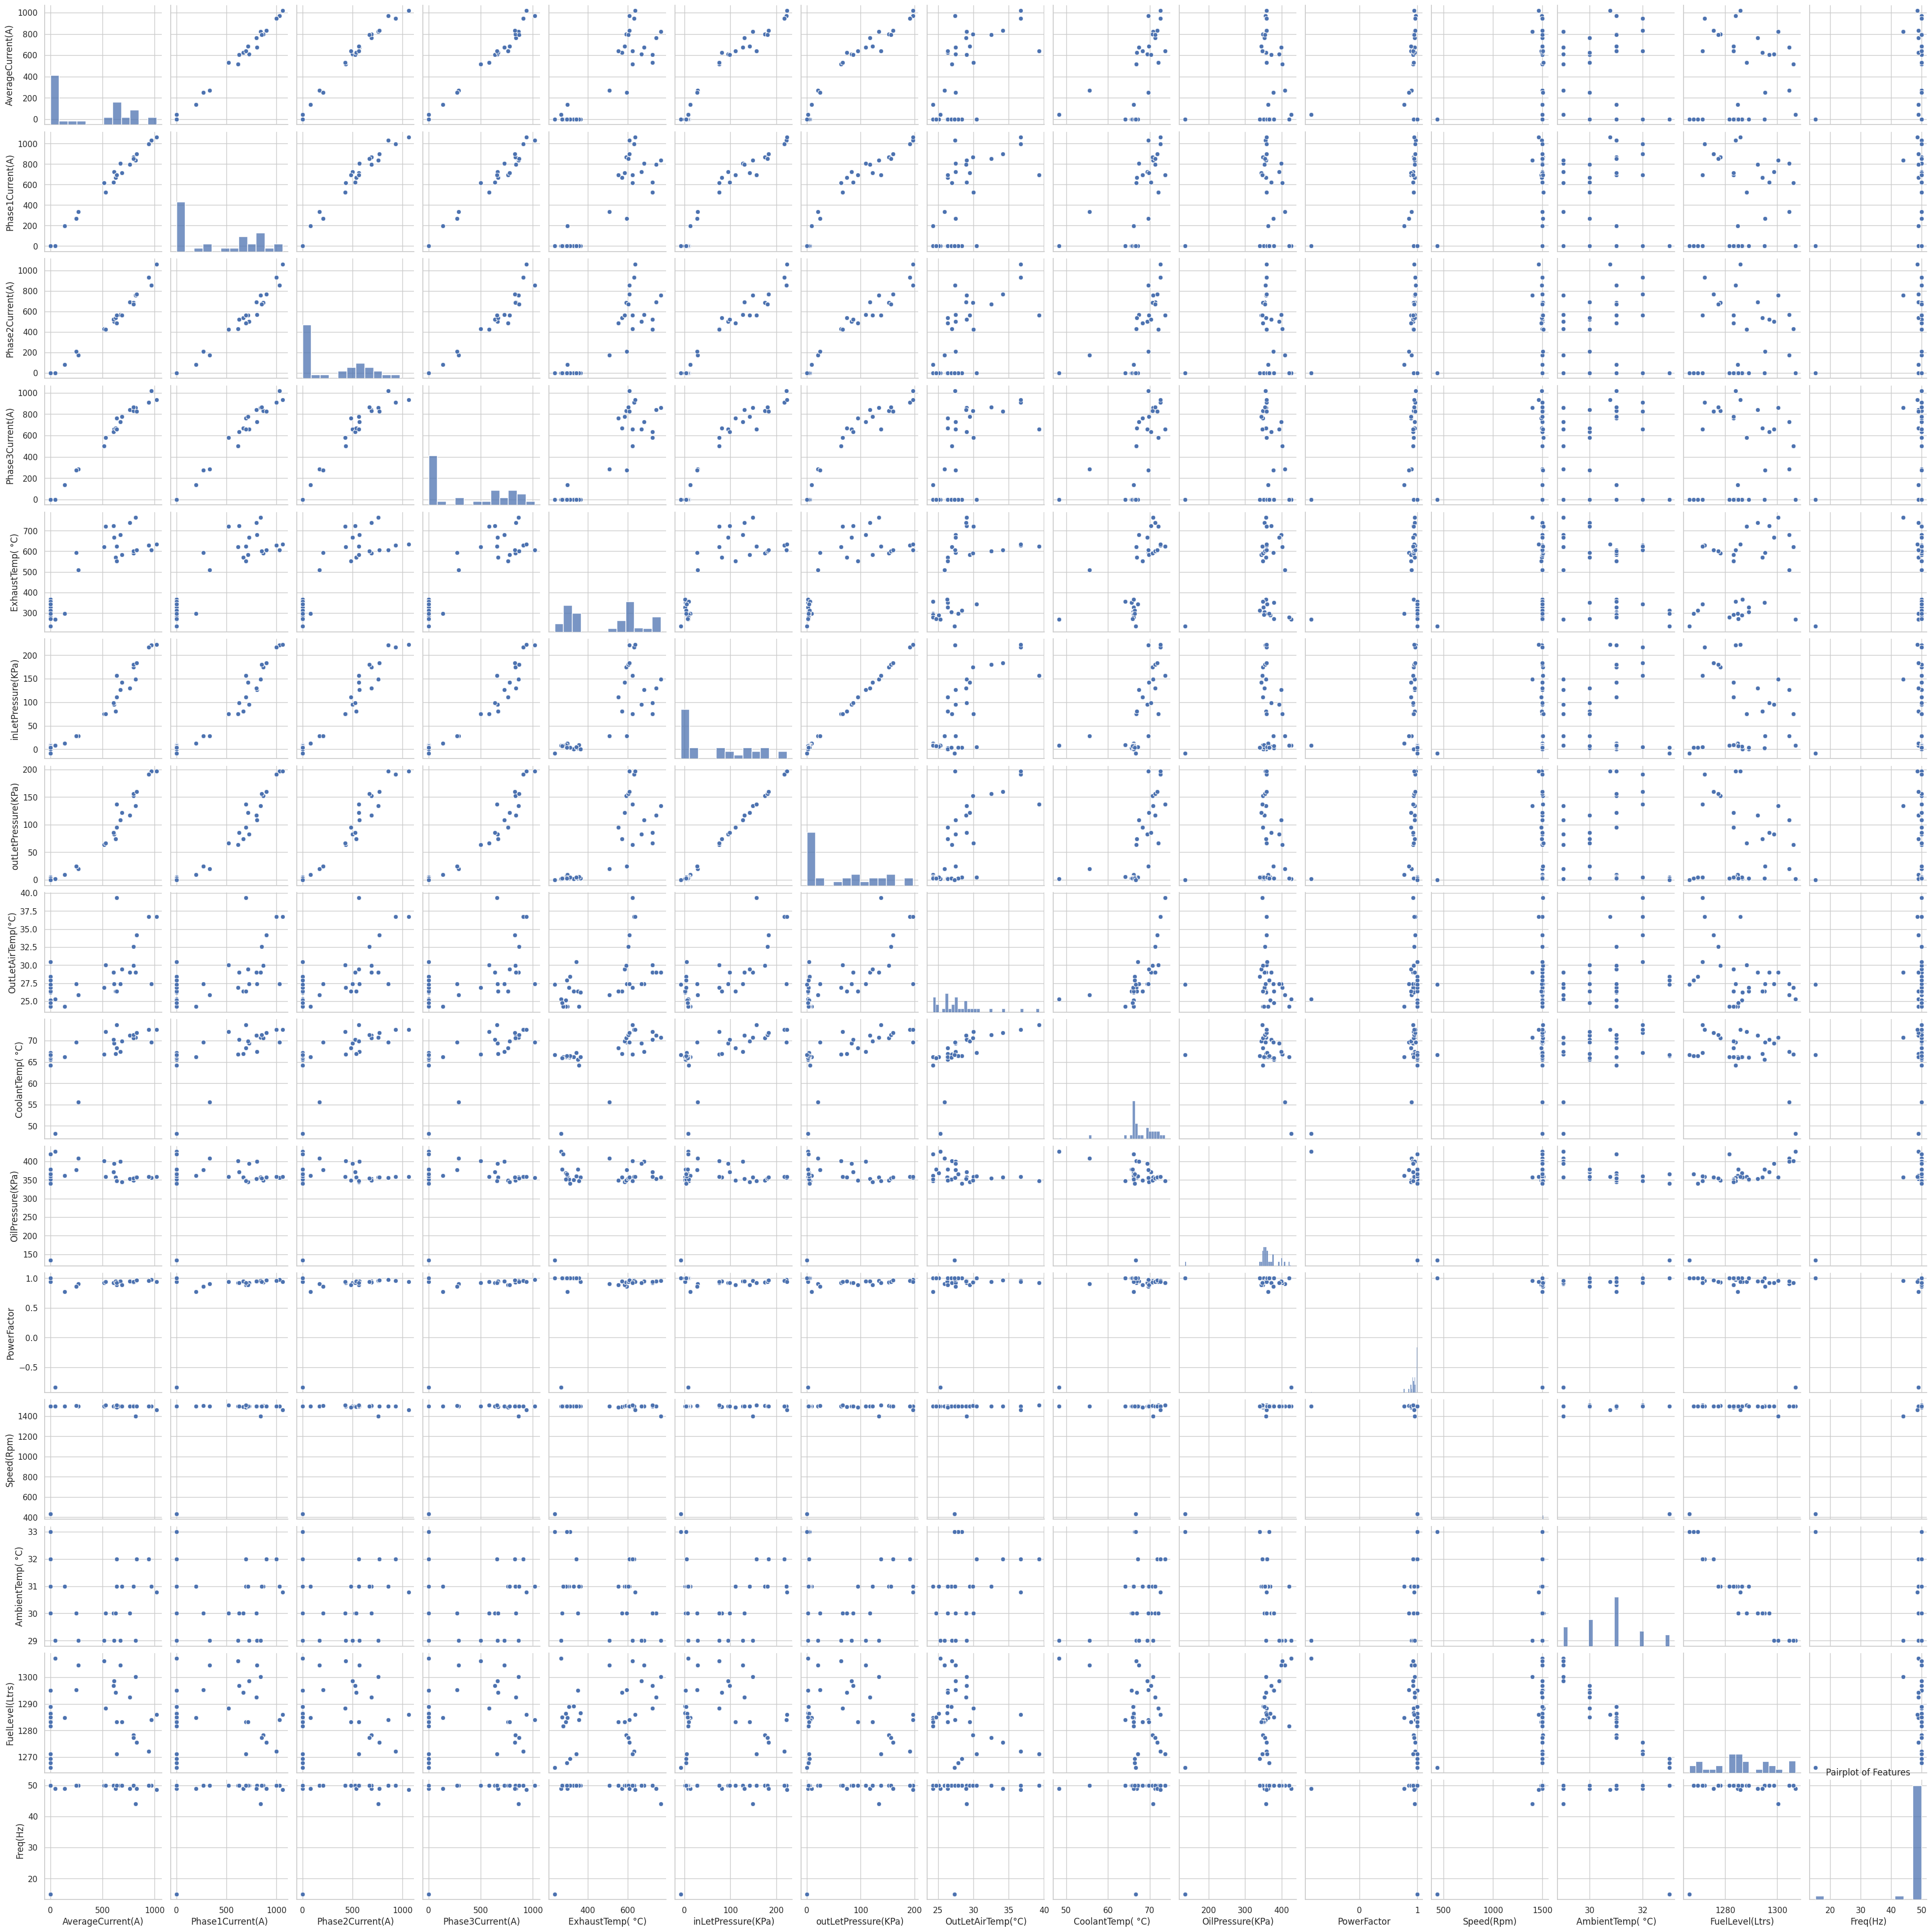

<Figure size 640x480 with 0 Axes>

In [ ]:
# Pairplot for Relationships

sns.pairplot(genset_data)
plt.title("Pairplot of Features")
plt.show()
# Save the plot with a high resolution
plt.savefig('pairplot_high_res.svg', dpi=600)

**Distribution of Average Current (A)**

<ul>
<li>The histogram shows that the most common average current values are clustered around the lower end of the scale, with a significant peak at the beginning of the distribution.
<li>There are several other smaller peaks present, suggesting that the genset operates at several distinct load levels.
<li>The long tail to the right indicates that there are periods where the genset operates at higher current levels, which may be less common but could be significant in terms of stress on the genset.
</ul>

Hypothesis: The genset is primarily used at a low to moderate load but occasionally runs at higher loads. The operational patterns could be related to specific time periods or external factors that should be investigated.

**Boxplot of Exhaust Temperature (°C)**

<ul>
<li>The boxplot does not show the typical characteristics, such as median, quartiles, or outliers. This could indicate that the exhaust temperature has a very narrow range of values without much variation, or it could be a result of the visualization scale being skewed by outliers.
<li>Given the lack of visible variation in the boxplot, it may be necessary to inspect the raw data or adjust the scale of the plot to better understand the distribution.
</ul>

Hypothesis: The exhaust temperature is generally consistent, possibly indicating stable genset operation or an issue with the temperature sensor or data recording process.

**Correlation Heatmap**

<ul>
<li>The current-related features (AverageCurrent, Phase1Current, Phase2Current, Phase3Current) are highly correlated with each other, as expected since they should all reflect the load on the genset.
<li>Exhaust temperature shows a moderate to high correlation with current-related features, suggesting that as the load increases, the exhaust temperature does as well.
<li>There's a strong negative correlation between ambient temperature and fuel level, which could suggest higher fuel consumption at higher temperatures or a data recording pattern.
</ul>

Hypothesis: The genset's operating parameters are closely interrelated, with electrical load impacting temperature measurements. There may also be environmental or operational factors influencing fuel consumption.

# Feature Engineering

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## 1. Domain-Based Features:

In [11]:
genset_data['Load_Factor'] = genset_data['AverageCurrent(A)'] / genset_data['Phase1Current(A)'].max()

In [12]:
genset_data['Temp_Gradient'] = genset_data['ExhaustTemp( °C)'] - genset_data['CoolantTemp( °C)']

In [13]:
#genset_data['Temp_Rise_Rate'] = genset_data['ExhaustTemp( °C)'].diff()

In [14]:
genset_data['Pressure_Ratio'] = genset_data['inLetPressure(KPa)'] / genset_data['outLetPressure(KPa)']

In [15]:
genset_data['Imbalance_Current'] = genset_data[['Phase1Current(A)', 'Phase2Current(A)', 'Phase3Current(A)']].std(axis=1)

In [16]:
genset_data['Power_Factor_Deviation'] = 1 - genset_data['PowerFactor'].abs()

## 2. Feature Scaling:

In [17]:
# Identify numerical features

numerical_features = genset_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Anomaly Detection

In [18]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.7 MB/s eta 0:00:00


In [19]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, Conv1DTranspose, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import datetime

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [20]:
domain_features = ['Load_Factor', 'Temp_Gradient', 'Pressure_Ratio', 'Imbalance_Current','Power_Factor_Deviation']
numerical_features += domain_features

In [21]:
print("NaN values before scaling:", genset_data[numerical_features].isna().sum().sum())

NaN values before scaling: 0


In [22]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genset_data[numerical_features])

In [23]:
# Double-check if scaled_data contains any NaN values
assert not np.isnan(scaled_data).any(), "Scaled data contains NaN after re-scaling"
assert not np.isinf(scaled_data).any(), "Scaled data contains Inf after re-scaling"

In [24]:
sequence_length = 10
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        sequence = data[i:(i + seq_length)]
        xs.append(sequence)
    return np.array(xs)

scaled_data_seq = create_sequences(scaled_data, sequence_length)


features = scaled_data.shape[1]

In [25]:
class TransformerEncoderBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [26]:
# Define the generator and discriminator models
def build_generator(seq_length, features):
    model = Sequential([
        layers.Input(shape=(seq_length, features)),
        layers.Conv1D(64, 5, strides=1, padding="causal", activation="relu", dilation_rate=1),
        layers.Conv1D(128, 5, strides=1, padding="causal", activation="relu", dilation_rate=2),
        layers.LayerNormalization(),
        # Transformer block - ensuring it's compatible with input/output dimensions
        TransformerEncoderBlock(embed_dim=128, num_heads=2, ff_dim=32),
        layers.GlobalAveragePooling1D(),
        layers.RepeatVector(seq_length),
        layers.Conv1DTranspose(64, 5, strides=1, padding="same", activation="relu"),
        layers.Conv1DTranspose(features, 5, strides=1, padding="same", activation="tanh"),
    ])
    return model



def build_discriminator(seq_length, features):
    model = Sequential([
        Input(shape=(seq_length, features)),
        Conv1D(64, 5, strides=1, padding="causal", activation="relu"),
        Dropout(0.2),
        Conv1D(128, 5, strides=2, padding="causal", activation="relu"),
        Dropout(0.2),
        Flatten(),
        Dense(1, activation='sigmoid'),
    ])
    return model

In [27]:
# GAN Class
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_sequences):
        batch_size = tf.shape(real_sequences)[0]
        noise = tf.random.normal(shape=(batch_size, sequence_length, features))

        # Train discriminator
        with tf.GradientTape() as disc_tape:
            generated_sequences = self.generator(noise, training=True)
            real_output = self.discriminator(real_sequences, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            disc_loss = self.loss_fn(tf.ones_like(real_output), real_output) + self.loss_fn(tf.zeros_like(fake_output), fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        # Train generator
        with tf.GradientTape() as gen_tape:
            generated_sequences = self.generator(noise, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            gen_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))

        return {'d_loss': disc_loss, 'g_loss': gen_loss}

In [28]:
# Model hyperparameters
sequence_length = 10
features = scaled_data.shape[1]
generator = build_generator(sequence_length, features)
discriminator = build_discriminator(sequence_length, features)

In [29]:
# Compile GAN
gan = GAN(generator=generator, discriminator=discriminator)
gan.compile(
    g_optimizer=Adam(1e-4),
    d_optimizer=Adam(1e-4),
    loss_fn=BinaryCrossentropy(from_logits=False),
)

In [30]:
# Callbacks
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='g_loss',
    mode='min',
    save_best_only=True)

In [31]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [32]:
early_stopping_callback = EarlyStopping(
    monitor='g_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True)

In [33]:
# Train the model
gan.fit(scaled_data_seq, epochs=100, callbacks=[model_checkpoint_callback, tensorboard_callback, early_stopping_callback])

Epoch 1/100
60/60 [==============================] - 10s 45ms/step - d_loss: 1.2727 - g_loss: 0.6037
Epoch 2/100
60/60 [==============================] - 2s 41ms/step - d_loss: 0.9880 - g_loss: 0.8506
Epoch 3/100
60/60 [==============================] - 4s 71ms/step - d_loss: 0.8136 - g_loss: 0.9606
Epoch 4/100
60/60 [==============================] - 2s 41ms/step - d_loss: 0.6574 - g_loss: 1.2932
Epoch 5/100
60/60 [==============================] - 2s 41ms/step - d_loss: 0.8479 - g_loss: 1.1141
Epoch 6/100
60/60 [==============================] - 2s 41ms/step - d_loss: 0.9958 - g_loss: 1.1951
Epoch 7/100
60/60 [==============================] - 3s 51ms/step - d_loss: 1.1001 - g_loss: 1.0087
Epoch 8/100
60/60 [==============================] - 4s 72ms/step - d_loss: 0.9462 - g_loss: 1.1454
Epoch 9/100
60/60 [==============================] - 2s 41ms/step - d_loss: 0.6649 - g_loss: 1.4693
Epoch 10/100
60/60 [==============================] - 3s 42ms/step - d_loss: 0.3250 - g_loss: 2.310

In [34]:
# Anomaly detection
def detect_anomalies(generator, discriminator, real_data, threshold=0.5):
    # Generate fake sequences
    batch_size = real_data.shape[0]
    random_latent_vectors = tf.random.normal(shape=(batch_size, sequence_length, features))
    generated_sequences = generator.predict(random_latent_vectors)

    # Get discriminator predictions for both real and fake data
    real_predictions = discriminator.predict(real_data)
    fake_predictions = discriminator.predict(generated_sequences)

    # Identify real sequences that are classified as fake
    anomalies = real_data[real_predictions.flatten() < threshold]

    return anomalies, real_predictions, fake_predictions

In [35]:
def split_data(data, test_size=0.2):
    """
    Splits the data into training and validation sets.
    :param data: The complete dataset.
    :param test_size: The proportion of the dataset to include in the validation split.
    :return: train_data, val_data
    """
    train_data, val_data = train_test_split(data, test_size=test_size, random_state=42)
    return train_data, val_data


In [36]:
def determine_optimal_threshold(generator, discriminator, val_data, num_trials=50):
    """
    Determines the optimal threshold for anomaly detection.
    :param generator: The trained generator model.
    :param discriminator: The trained discriminator model.
    :param val_data: Validation data to test the threshold.
    :param num_trials: Number of trials to average for determining the threshold.
    :return: optimal_threshold
    """
    thresholds = np.linspace(0, 1, num_trials)
    optimal_threshold = 0
    best_accuracy = 0

    for threshold in thresholds:
        correct_predictions = 0
        total_predictions = 0

        for sequence in val_data:
            real_prediction = discriminator.predict(np.array([sequence]))
            is_real = real_prediction > threshold

            correct_predictions += int(is_real)
            total_predictions += 1

        accuracy = correct_predictions / total_predictions
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_threshold = threshold

    return optimal_threshold


In [37]:
# Split my data into training and validation sets
train_data, val_data = split_data(scaled_data_seq, test_size=0.2)

# Determine the optimal threshold using the validation data
optimal_threshold = determine_optimal_threshold(generator, discriminator, val_data)

# Then use this threshold for anomaly detection
anomalies, real_predictions, fake_predictions = detect_anomalies(generator, discriminator, scaled_data_seq, optimal_threshold)


Streaming output truncated to the last 5000 lines.
60/60 [==============================] - 0s 3ms/step


In [42]:
# Assuming `real_sequences` is your scaled and sequenced dataset ready for the model
real_predictions = gan.discriminator.predict(scaled_data_seq)

60/60 [==============================] - 0s 4ms/step


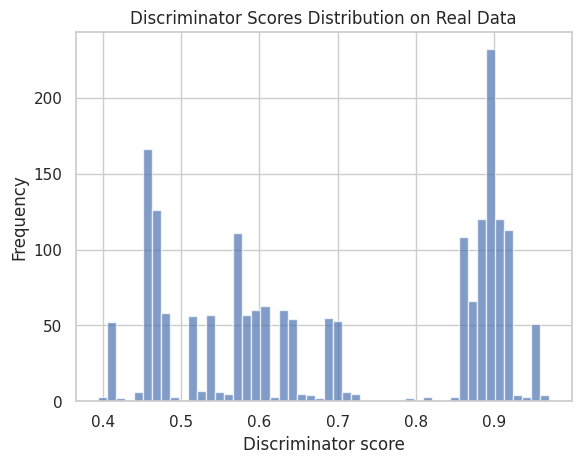

In [43]:
# Plot the distribution of discriminator scores for real data
plt.hist(real_predictions, bins=50, alpha=0.7)
plt.title('Discriminator Scores Distribution on Real Data')
plt.xlabel('Discriminator score')
plt.ylabel('Frequency')
plt.show()

In [44]:
threshold = 0.5

In [46]:
# Detect anomalies
anomalies_indices = np.where(real_predictions < threshold)[0]
anomalies = scaled_data_seq[anomalies_indices]
print(f"Detected {len(anomalies)} potential anomalies.")

Detected 417 potential anomalies.


In [40]:
# Save GAN model
gan.generator.save('generator_model.h5')
gan.discriminator.save('discriminator_model.h5')

# Save the StandardScaler
import joblib
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [47]:
def inverse_transform(scaled_data, scaler):
    return scaler.inverse_transform(scaled_data)

In [48]:
# Identify characteristics of anomalies
anomalies_data = inverse_transform(anomalies.reshape(-1, features), scaler)


In [49]:
# Convert anomalies_data back to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_data, columns=numerical_features)


In [50]:
# Analyze statistical properties of anomalies
print(anomalies_df.describe())

       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        4170.000000       4170.000000      4.170000e+03   
mean          803.521583        859.778657      7.050254e+02   
std           126.946889        133.877454      1.530313e+02   
min             0.000000          0.000000      5.684342e-14   
25%           685.000000        714.000000      5.650000e+02   
50%           796.000000        869.000000      6.880000e+02   
75%           945.000000        997.000000      8.560000e+02   
max          1019.000000       1061.000000      1.061000e+03   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       4170.000000       4170.000000         4170.000000   
mean         848.952278        594.918731          175.118071   
std          102.452211         28.812317           37.865030   
min            0.000000        298.223800            9.639465   
25%          777.000000        582.801000          141.863900   
50%          830.000000        60

In [51]:
# Compare with overall dataset statistics
print(genset_data[numerical_features].describe())

       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        1929.000000       1929.000000       1929.000000   
mean          377.021773        409.476931        324.500259   
std           355.377103        381.369756        317.589660   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%           269.000000        334.000000        207.000000   
75%           673.000000        725.000000        565.000000   
max          1019.000000       1061.000000       1061.000000   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       1929.000000       1929.000000         1929.000000   
mean         398.961120        490.048312           72.983006   
std          374.911521        169.964874           73.604658   
min            0.000000        235.242500           -8.433533   
25%            0.000000        306.432000            5.849976   
50%          287.000000        55

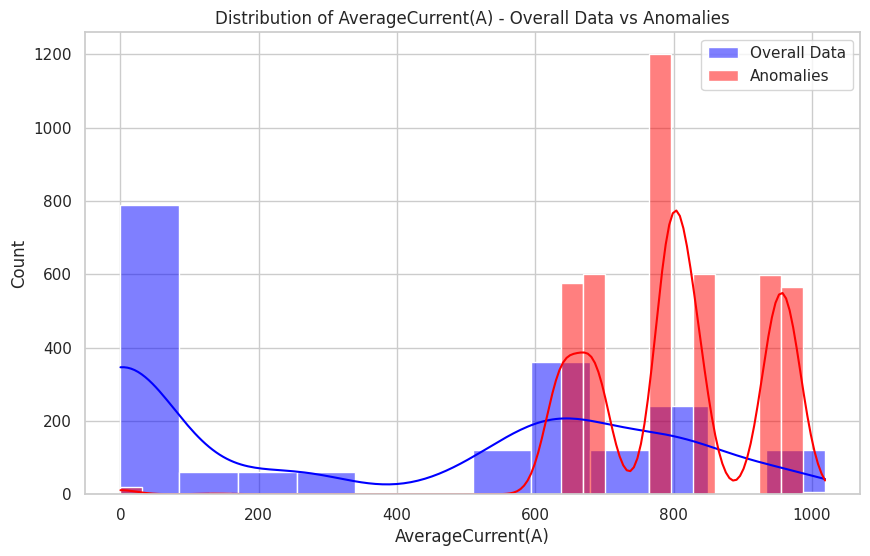

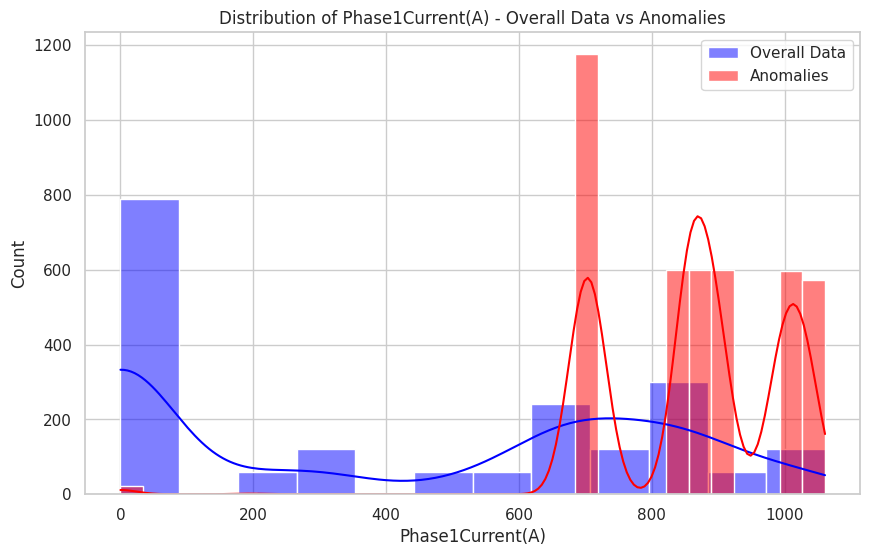

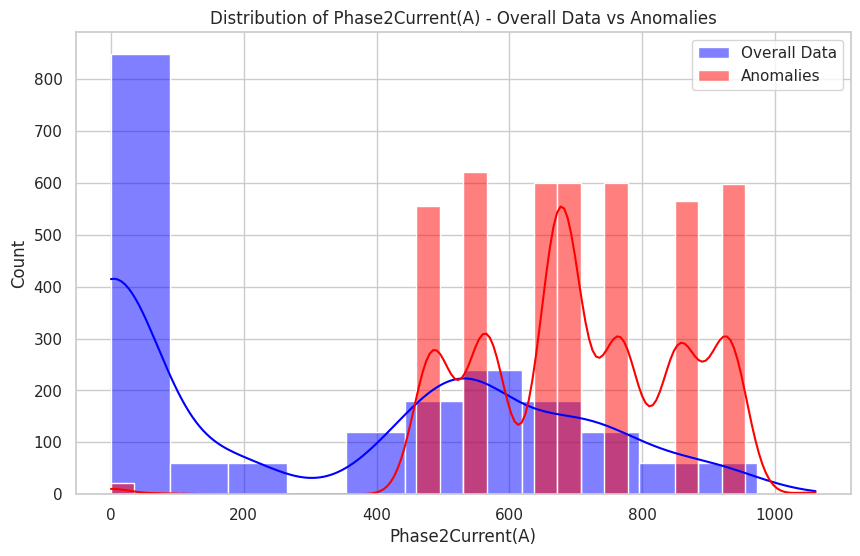

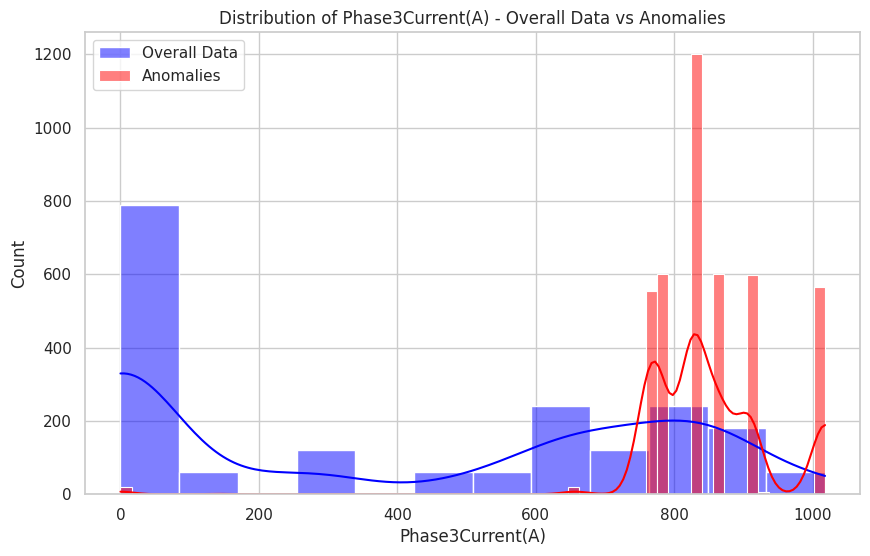

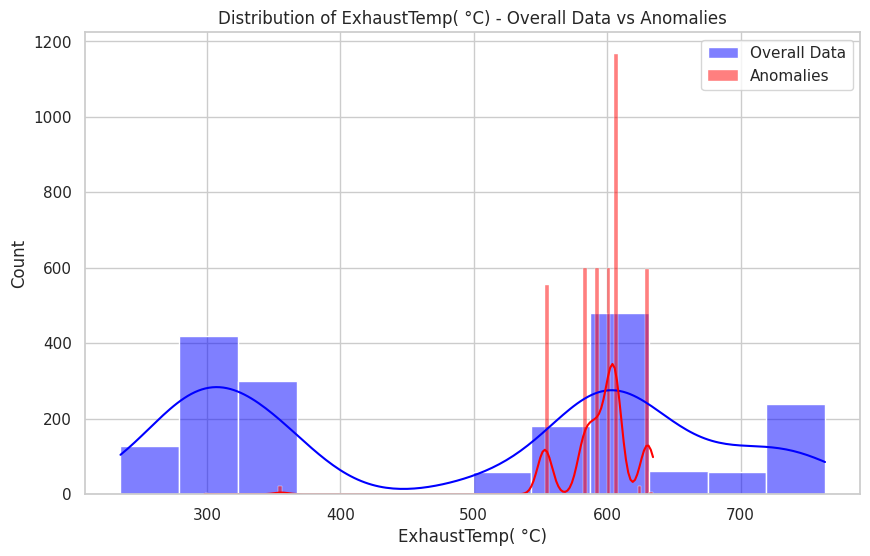

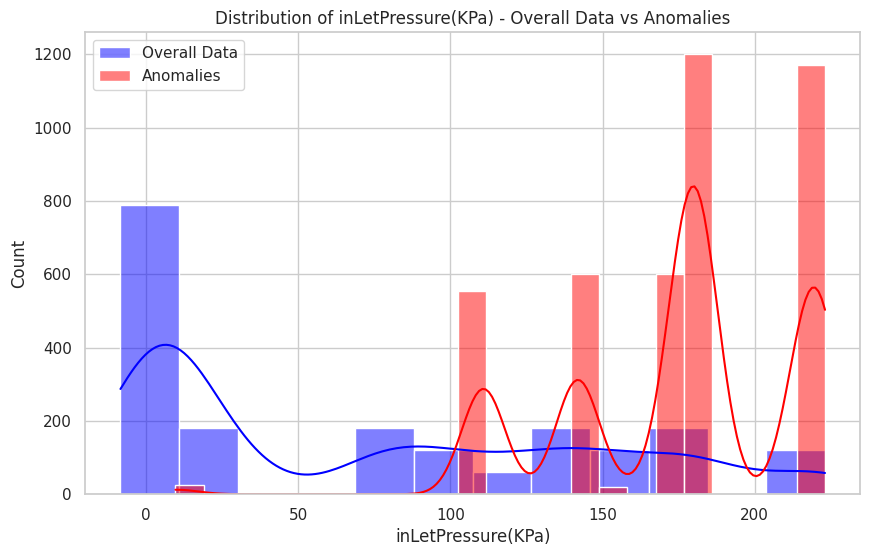

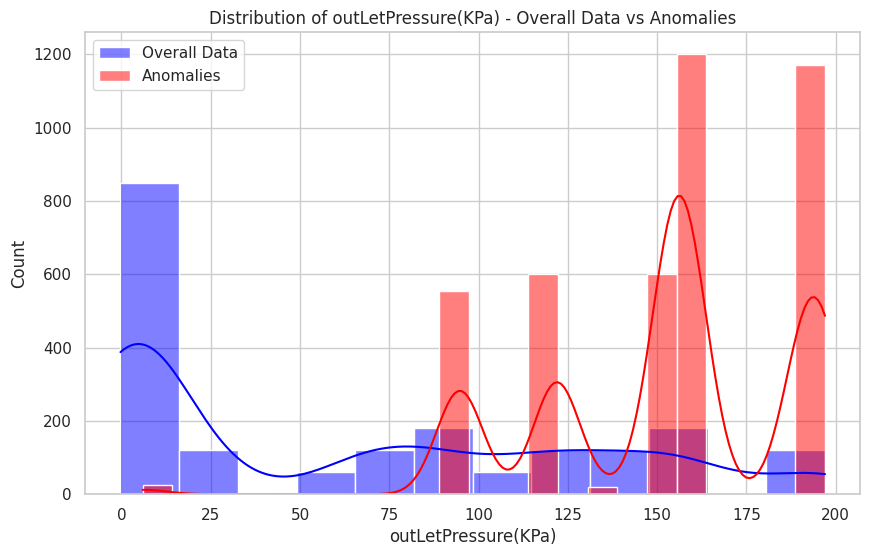

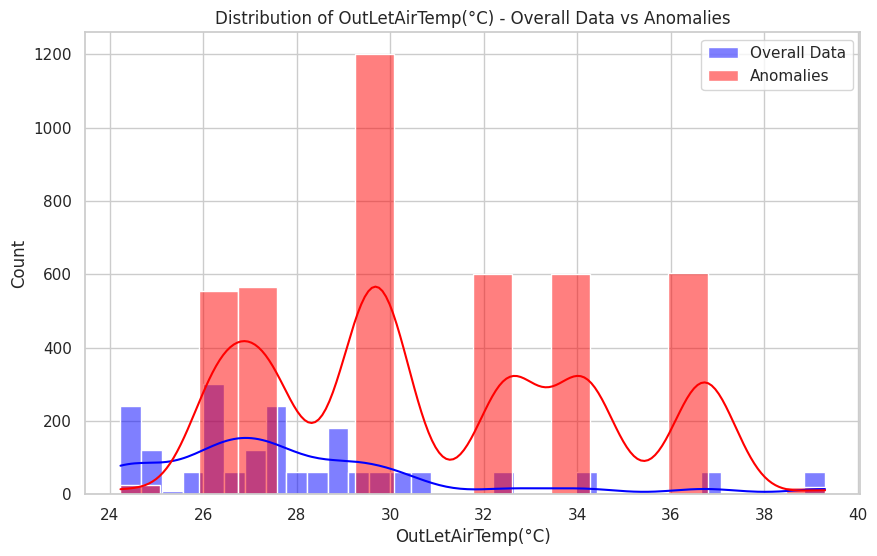

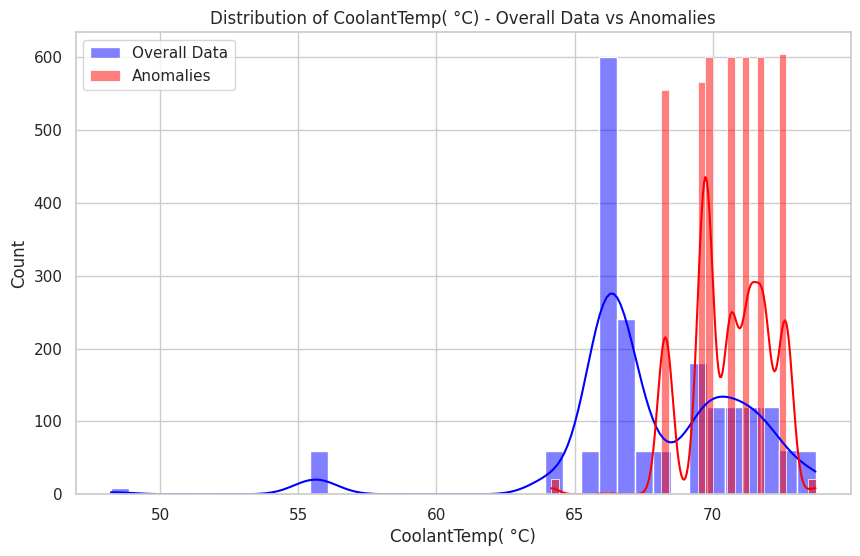

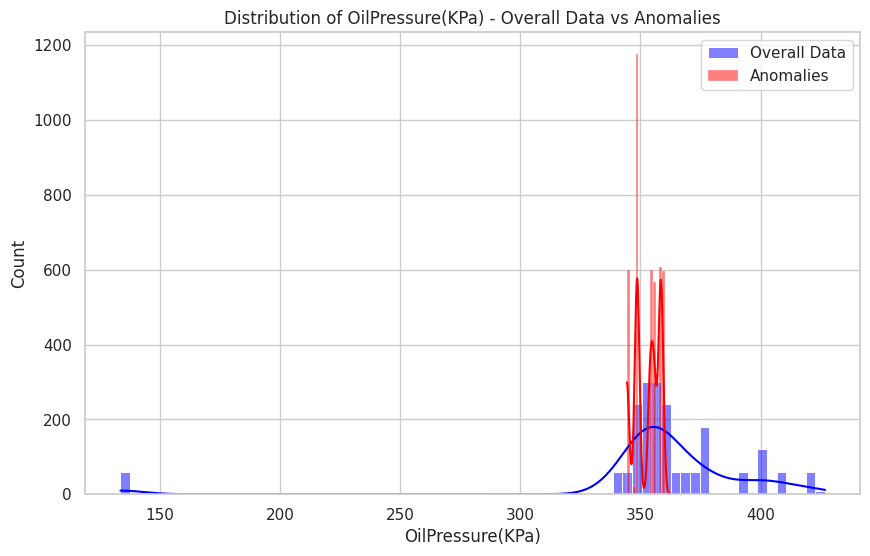

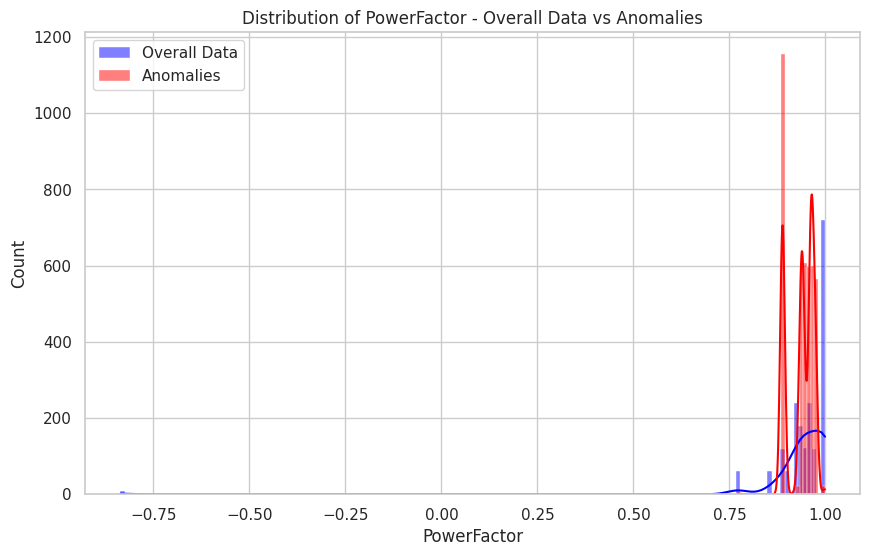

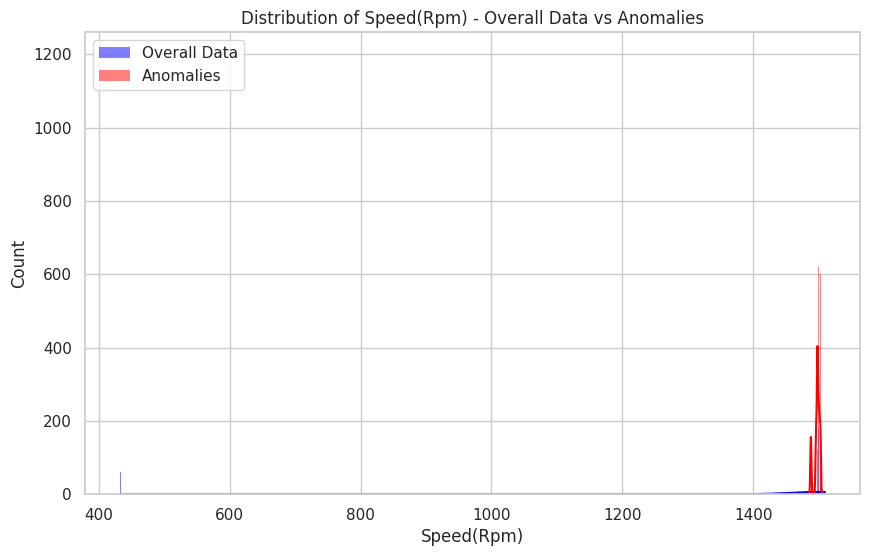

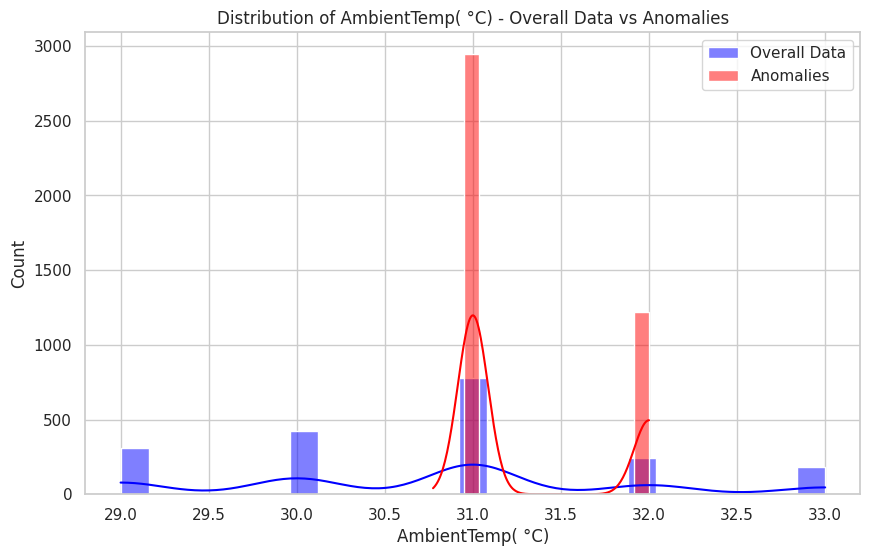

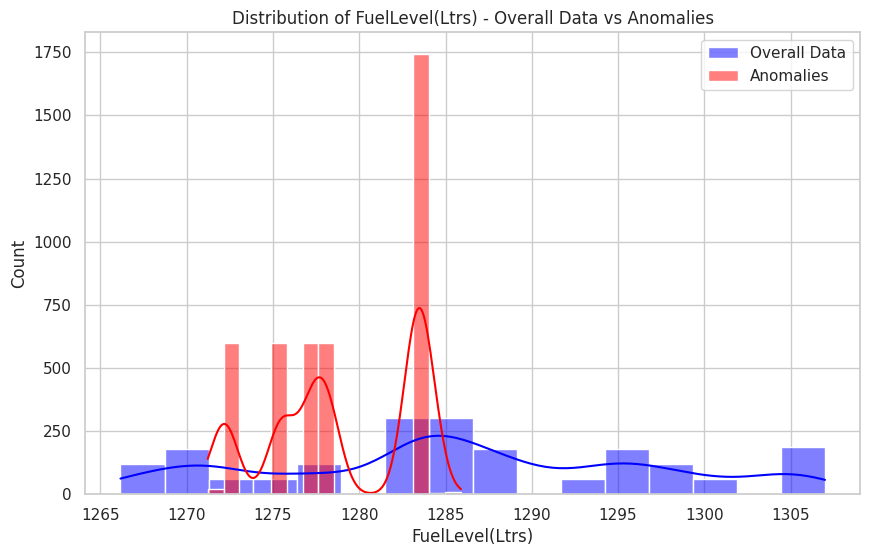

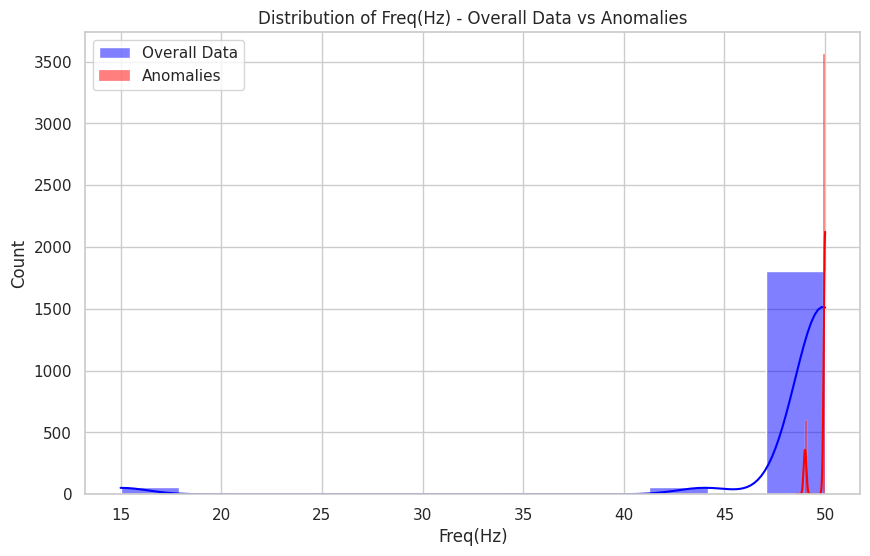

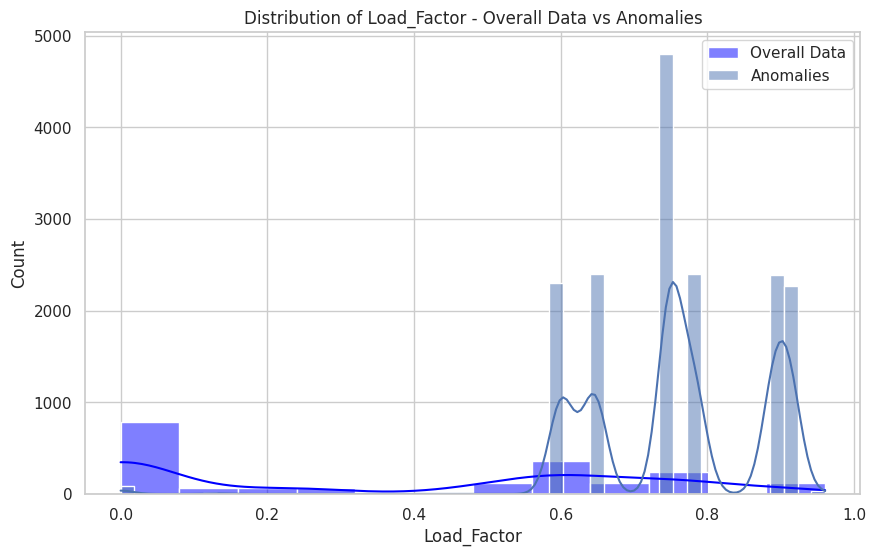

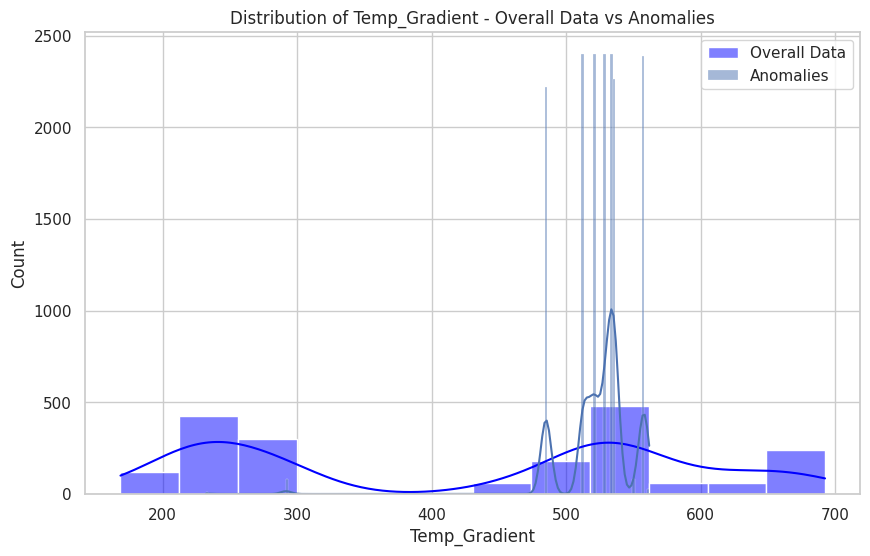

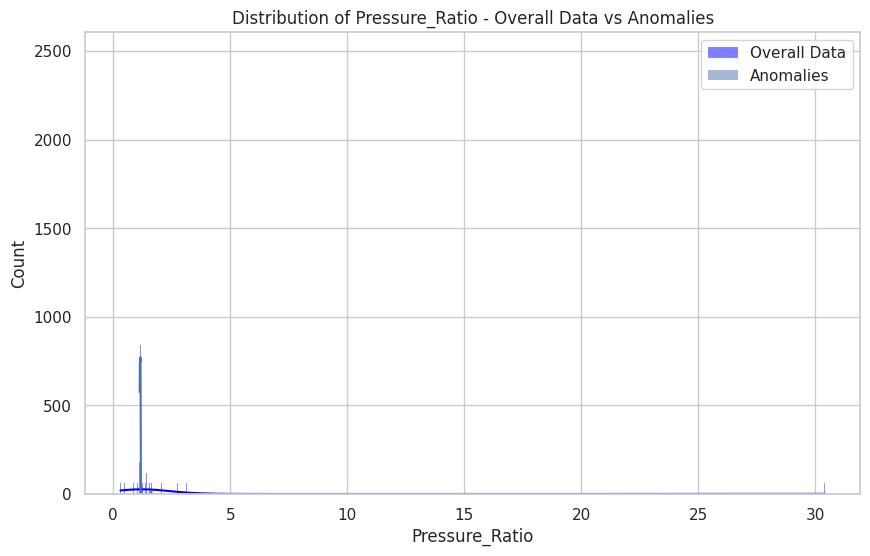

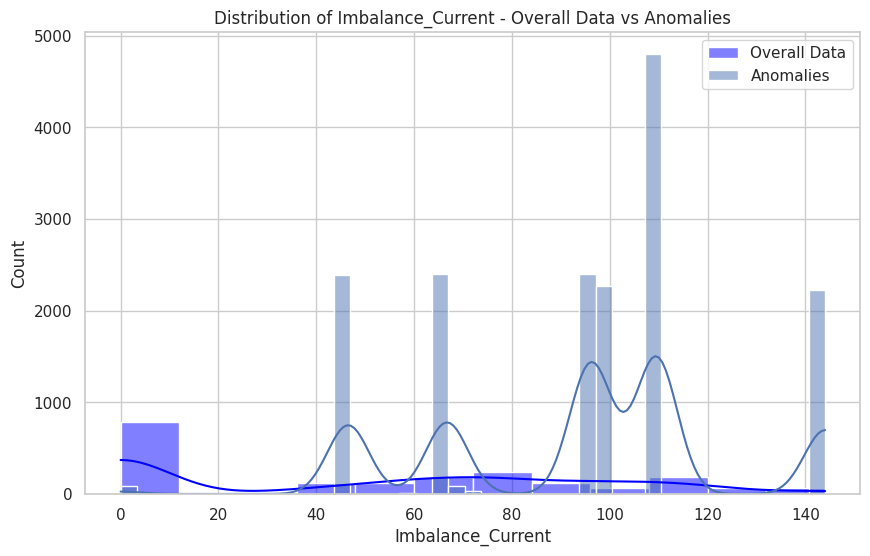

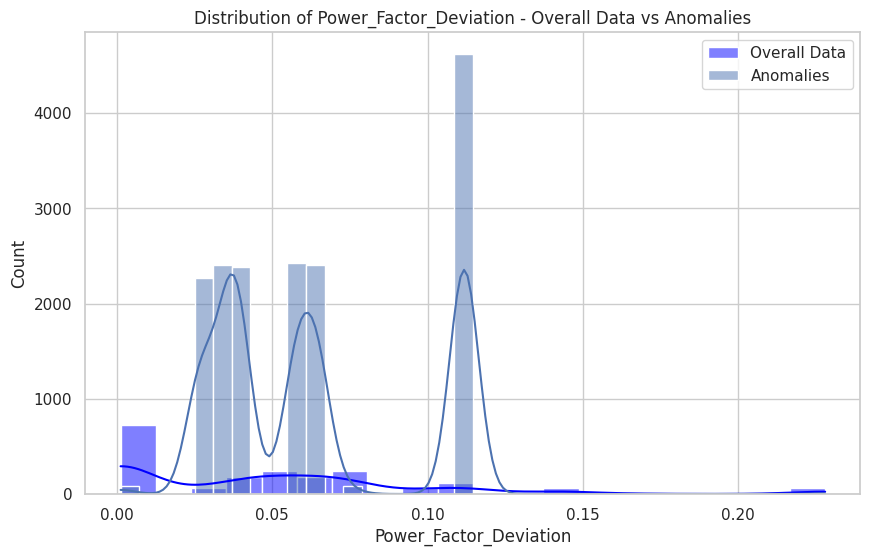

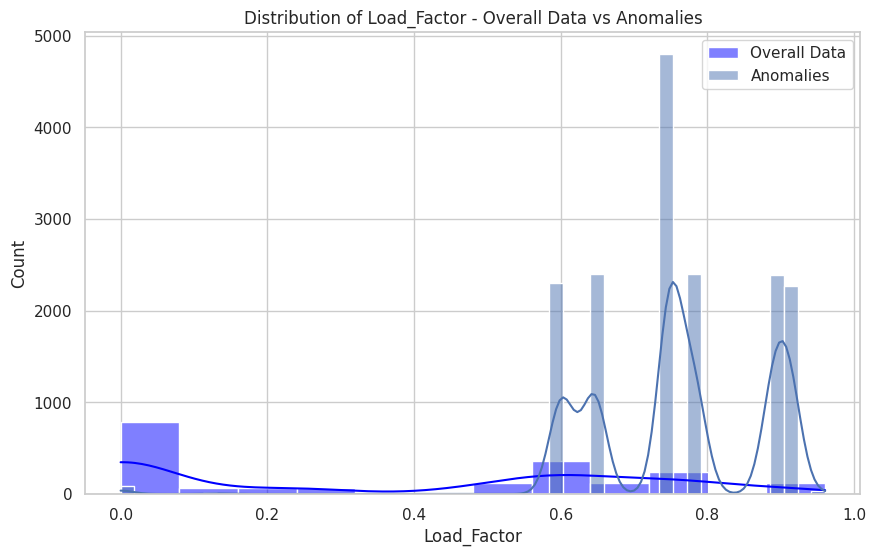

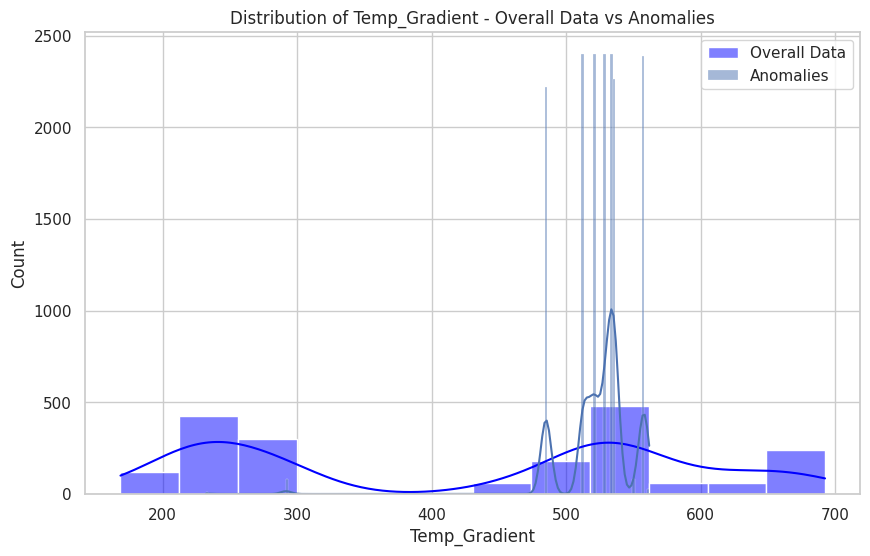

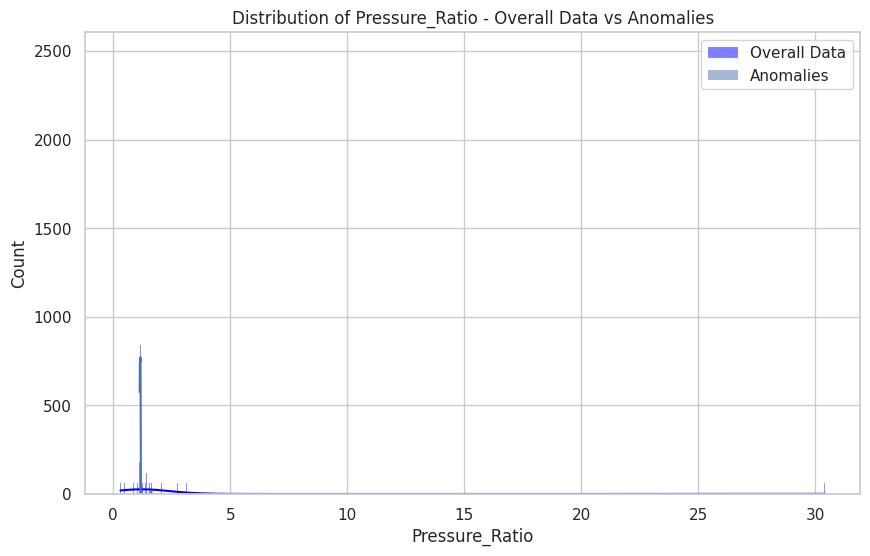

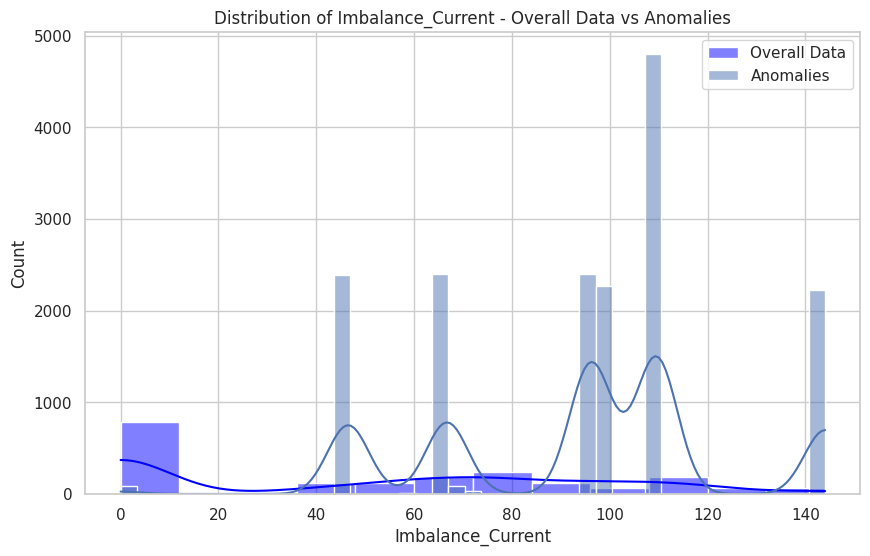

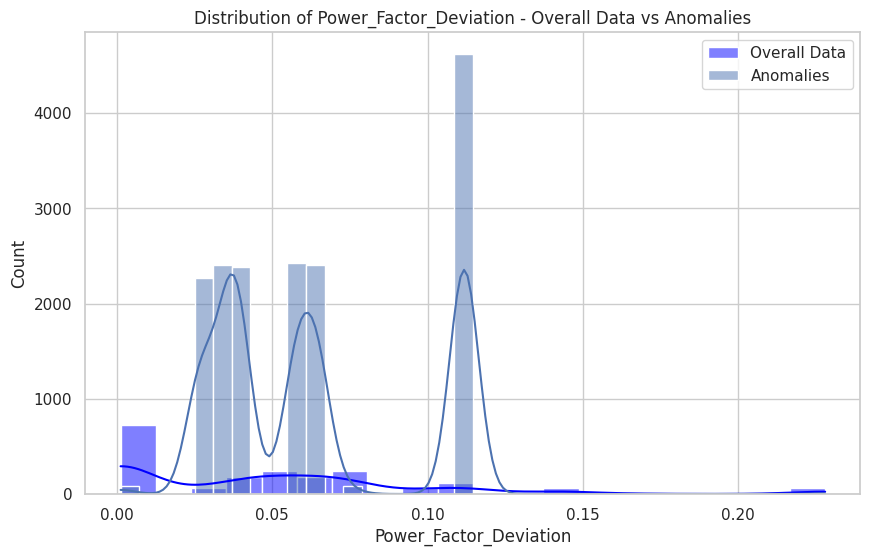

In [52]:
# Visualize anomalies in the context of the overall data distribution
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(genset_data[feature], color="blue", label="Overall Data", kde=True)
    sns.histplot(anomalies_df[feature], color="red", label="Anomalies", kde=True)
    plt.title(f"Distribution of {feature} - Overall Data vs Anomalies")
    plt.legend()
    plt.show()

# Diagnostic Analytics